# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:

Import the necessary libraries and create your dataframe(s).

In [146]:
#LINK TO DATA SET (2022 County Health Rankings National Data)
https://www.countyhealthrankings.org/explore-health-rankings/rankings-data-documentation

SyntaxError: invalid syntax (2650046149.py, line 2)

In [ ]:
#IMPROTING LIBARIES 
import pandas as pd 
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



df = pd.read_csv("/Users/leahjohnson/Desktop/LaunchCode/eda-checkpoint/Assignment 4 Dataset.csv",header=1)
df.head()

In [ ]:
df.drop(columns=['# deaths due to COVID-19 during 2020', 'FIPS','COVID-19 death rate','Denominator','Numerator','Non-Petitioned Cases','female' 'Petitioned Cases'],errors='ignore',inplace=True)
df

# Check to see if it dropped the correct columns

In [ ]:
df.info()

In [ ]:
print(df.shape)
print(df.dtypes)

df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [ ]:
# Checking the overall percentage of missing data from the data set

total_cells = np.product(df.shape)

missing_cells = pd.isnull(df).sum()

total_missing = missing_cells.sum()

percentage_missing = round((total_missing/total_cells), 2) *100

print(percentage_missing, "% Missing cells from the data")    

# Missing Data by Columns

In [ ]:
# Plot a heatmap of any missing data
cols = df.columns[:50] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))



# Missing Data Percentage List

In [ ]:
df[non_numeric_cols].info()

States is the only column with no missing data

In [ ]:
num_missing = df.isna().sum()
num_missing[:50]

In [ ]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Observed most of the higher percentage missing are CI %'s. Although I am looking at race/ethincity the other columns have that data as well.

Dropped columns with CI numbers as stated previously

In [ ]:
df_less_cols= df.loc[:, ~df.columns.str.contains("95% CI - ")]
df_less_cols.shape

the numbers of columns dropped to 250 while the rows stayed the same

# Rows

There are about 15 obersvations with no missng vaules and close to 155 with 176 missing values 

In [ ]:
missing_rows = sum(df.isnull().any(axis=1))

In [ ]:

null_data = df_less_cols[df_less_cols.isnull().any(axis=1)]
print('{} - {}%'.format(null_data, round(null_data*100)))


In [ ]:
df_less_cols.isnull().head()

In [ ]:
df_less_cols.isnull().sum()

In [147]:
df_less_cols[df_less_cols['Life Expectancy (Asian)'].isnull()]

State      County  Life Expectancy  Life Expectancy (AIAN)  \
1     Alabama     Autauga             76.6                     NaN   
3     Alabama     Barbour             72.9                     NaN   
4     Alabama        Bibb             73.6                     NaN   
5     Alabama      Blount             74.2                     NaN   
6     Alabama     Bullock             73.8                     NaN   
...       ...         ...              ...                     ...   
3188  Wyoming  Sweetwater             76.5                     NaN   
3189  Wyoming       Teton             86.7                     NaN   
3190  Wyoming       Uinta             77.0                     NaN   
3191  Wyoming    Washakie             78.8                     NaN   
3192  Wyoming      Weston             80.7                     NaN   

      Life Expectancy (Asian)  Life Expectancy (Black)  \
1                         NaN                     73.9   
3                         NaN                     70.6   
4                         NaN                     72.3   
5                         NaN                      NaN   
6                         NaN                     71.6   
...                       ...                      ...   
3188                      NaN                      NaN   
3189                      NaN                      NaN   
3190                      NaN                      NaN   
3191                      NaN                      NaN   
3192                      NaN                      NaN   

      Life Expectancy (Hispanic)  Life Expectancy (white)  # Deaths  \
1                           94.1                     77.0     836.0   
3                            NaN                     75.1     539.0   
4                            NaN                     73.5     460.0   
5                           98.2                     73.6    1143.0   
6                            NaN                     79.0     203.0   
...                          ...                      ...       ...   
3188                        80.2                     76.2     599.0   
3189                         NaN                      NaN     111.0   
3190                        77.9                     76.7     287.0   
3191                         NaN                      NaN     115.0   
3192                         NaN                      NaN      75.0   

      Age-adjusted Death Rate  ...  % Native Hawaiian/Other Pacific Islander  \
1                       427.0  ...                                       0.1   
3                       590.0  ...                                       0.2   
4                       568.0  ...                                       0.1   
5                       533.0  ...                                       0.1   
6                       556.0  ...                                       0.8   
...                       ...  ...                                       ...   
3188                    420.0  ...                                       0.2   
3189                    133.0  ...                                       0.2   
3190                    414.0  ...                                       0.2   
3191                    370.0  ...                                       0.1   
3192                    263.0  ...                                       0.0   

      # Hispanic  % Hispanic  # Non-Hispanic white  % Non-Hispanic white  \
1           1741         3.1                 41079                  73.2   
3           1149         4.7                 11130                  45.3   
4            649         2.9                 16420                  74.2   
5           5524         9.5                 50238                  86.8   
6            885         8.9                  2104                  21.1   
...          ...         ...                   ...                   ...   
3188        6908        16.2                 33795                  79.2   
3189        3513        15.0                 190

In [148]:
df_less_cols[df_less_cols['Life Expectancy (Asian)'].notnull()]

State     County  Life Expectancy  Life Expectancy (AIAN)  \
0       Alabama        NaN             74.8                   111.8   
2       Alabama    Baldwin             77.7                   104.6   
37      Alabama  Jefferson             74.1                     NaN   
41      Alabama        Lee             77.7                     NaN   
42      Alabama  Limestone             77.1                     NaN   
...         ...        ...              ...                     ...   
3150  Wisconsin       Rock             77.6                     NaN   
3156  Wisconsin  Sheboygan             79.0                     NaN   
3164  Wisconsin   Waukesha             81.1                     NaN   
3167  Wisconsin  Winnebago             79.1                     NaN   
3169    Wyoming        NaN             78.1                    65.4   

      Life Expectancy (Asian)  Life Expectancy (Black)  \
0                        87.3                     72.4   
2                        82.5                     73.8   
37                       83.7                     71.7   
41                       89.6                     74.1   
42                       82.2                     77.1   
...                       ...                      ...   
3150                     88.8                     70.3   
3156                     77.5                     76.1   
3164                     86.5                     76.1   
3167                     84.1                     73.7   
3169                     84.3                     80.4   

      Life Expectancy (Hispanic)  Life Expectancy (white)  # Deaths  \
0                           94.6                     75.4   88086.0   
2                           86.6                     77.8    3377.0   
37                          96.6                     75.8   11877.0   
41                         107.7                     78.6    1915.0   
42                           NaN                     76.7    1429.0   
...                          ...                      ...       ...   
3150                        88.4                     77.8    2214.0   
3156                        79.7                     79.2    1343.0   
3164                        83.0                     81.1    3682.0   
3167                        82.1                     79.2    1907.0   
3169                        80.0                     78.3    7629.0   

      Age-adjusted Death Rate  ...  % Native Hawaiian/Other Pacific Islander  \
0                       500.0  ...                                       0.1   
2                       382.0  ...                                       0.1   
37                      524.0  ...                                       0.1   
41                      377.0  ...                                       0.1   
42                      401.0  ...                                       0.2   
...                       ...  ...                                       ...   
3150                    373.0  ...                                       0.1   
3156                    305.0  ...                                       0.1   
3164                    235.0  ...                                       0.1   
3167                    313.0  ...                                       0.1   
3169                    368.0  ...                                       0.1   

      # Hispanic  % Hispanic  # Non-Hispanic white  % Non-Hispanic white  \
0         226557         4.6               3205777                  65.1   
2          10625         4.6                191015                  83.3   
37         26824         4.1                322562                  49.2   
41          6296         3.8                112727                  67.6   
42          6338         6.2                 77343                  75.7   
...          ...         ...                   ...                   ...   
3150       15391         9.4                133421                  81.8   
3156        7913         6.9          

I ran the codes above to check if there was a reason and correlation of NaN values

In [149]:
df_fill= df_less_cols.fillna(0)
df_fill

State      County  Life Expectancy  Life Expectancy (AIAN)  \
0     Alabama           0             74.8                   111.8   
1     Alabama     Autauga             76.6                     0.0   
2     Alabama     Baldwin             77.7                   104.6   
3     Alabama     Barbour             72.9                     0.0   
4     Alabama        Bibb             73.6                     0.0   
...       ...         ...              ...                     ...   
3188  Wyoming  Sweetwater             76.5                     0.0   
3189  Wyoming       Teton             86.7                     0.0   
3190  Wyoming       Uinta             77.0                     0.0   
3191  Wyoming    Washakie             78.8                     0.0   
3192  Wyoming      Weston             80.7                     0.0   

      Life Expectancy (Asian)  Life Expectancy (Black)  \
0                        87.3                     72.4   
1                         0.0                     73.9   
2                        82.5                     73.8   
3                         0.0                     70.6   
4                         0.0                     72.3   
...                       ...                      ...   
3188                      0.0                      0.0   
3189                      0.0                      0.0   
3190                      0.0                      0.0   
3191                      0.0                      0.0   
3192                      0.0                      0.0   

      Life Expectancy (Hispanic)  Life Expectancy (white)  # Deaths  \
0                           94.6                     75.4   88086.0   
1                           94.1                     77.0     836.0   
2                           86.6                     77.8    3377.0   
3                            0.0                     75.1     539.0   
4                            0.0                     73.5     460.0   
...                          ...                      ...       ...   
3188                        80.2                     76.2     599.0   
3189                         0.0                      0.0     111.0   
3190                        77.9                     76.7     287.0   
3191                         0.0                      0.0     115.0   
3192                         0.0                      0.0      75.0   

      Age-adjusted Death Rate  ...  % Native Hawaiian/Other Pacific Islander  \
0                       500.0  ...                                       0.1   
1                       427.0  ...                                       0.1   
2                       382.0  ...                                       0.1   
3                       590.0  ...                                       0.2   
4                       568.0  ...                                       0.1   
...                       ...  ...                                       ...   
3188                    420.0  ...                                       0.2   
3189                    133.0  ...                                       0.2   
3190                    414.0  ...                                       0.2   
3191                    370.0  ...                                       0.1   
3192                    263.0  ...                                       0.0   

      # Hispanic  % Hispanic  # Non-Hispanic white  % Non-Hispanic white  \
0         226557         4.6               3205777                  65.1   
1           1741         3.1                 41079                  73.2   
2          10625         4.6                191015                  83.3   
3           1149         4.7                 11130                  45.3   
4            649         2.9                 16420                  74.2   
...          ...         ...                   ...                   ...   
3188        6908        16.2                 33795                  79.2   
3189        3513        15.0                 190

I will fill the missing values with  not drop these because this is due to demographics and certain populations may not live in that particular county. 

Check to see if NaN values were gone

<AxesSubplot:>

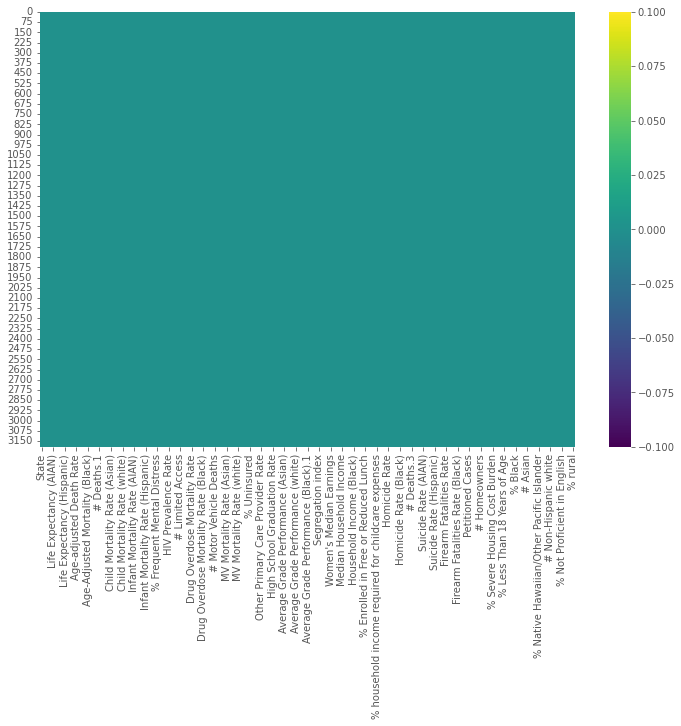

In [150]:
sns.heatmap(df_fill.isnull(), cmap='viridis')

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

# Spotting Outliers

In [151]:
df_fill.kurt(numeric_only=True)[:10]

Life Expectancy                    34.442457
Life Expectancy (AIAN)              5.470924
Life Expectancy (Asian)             0.239431
Life Expectancy (Black)            -1.891078
Life Expectancy (Hispanic)         -1.767035
Life Expectancy (white)            -1.902311
# Deaths                          295.921536
Age-adjusted Death Rate             2.497086
Age-Adjusted Mortality (AIAN)      12.969754
Age-Adjusted Mortality (Asian)     17.986609
dtype: float64

In [152]:
df_fill.describe(include='all')

State  County  Life Expectancy  Life Expectancy (AIAN)  \
count    3193  3193.0      3193.000000             3193.000000   
unique     51  1851.0              NaN                     NaN   
top     Texas     0.0              NaN                     NaN   
freq      255    51.0              NaN                     NaN   
mean      NaN     NaN        75.230598                9.057250   
std       NaN     NaN        11.714778               25.699625   
min       NaN     NaN         0.000000                0.000000   
25%       NaN     NaN        74.800000                0.000000   
50%       NaN     NaN        76.900000                0.000000   
75%       NaN     NaN        78.900000                0.000000   
max       NaN     NaN       112.500000              146.800000   

        Life Expectancy (Asian)  Life Expectancy (Black)  \
count               3193.000000              3193.000000   
unique                      NaN                      NaN   
top                         NaN                      NaN   
freq                        NaN                      NaN   
mean                  17.831600                32.016724   
std                   35.371961                36.846325   
min                    0.000000                 0.000000   
25%                    0.000000                 0.000000   
50%                    0.000000                 0.000000   
75%                    0.000000                72.900000   
max                  106.900000                99.500000   

        Life Expectancy (Hispanic)  Life Expectancy (white)       # Deaths  \
count                  3193.000000              3193.000000    3193.000000   
unique                         NaN                      NaN            NaN   
top                            NaN                      NaN            NaN   
freq                           NaN                      NaN            NaN   
mean                     34.604040                44.121297    2583.704980   
std                      42.215078                38.182615   14668.179879   
min                       0.000000                 0.000000       0.000000   
25%                       0.000000                 0.000000     189.000000   
50%                       0.000000                73.800000     445.000000   
75%                      82.900000                77.400000    1125.000000   
max                     124.400000               124.000000  378883.000000   

        Age-adjusted Death Rate  ...  \
count               3193.000000  ...   
unique                      NaN  ...   
top                         NaN  ...   
freq                        NaN  ...   
mean                 422.423426  ...   
std                  138.347404  ...   
min                    0.000000  ...   
25%                  338.000000  ...   
50%                  413.000000  ...   
75%                  503.000000  ...   
max                 1304.000000  ...   

        % Native Hawaiian/Other Pacific Islander    # Hispanic   % Hispanic  \
count                                3193.000000  3.193000e+03  3193.000000   
unique                                       NaN           NaN          NaN   
top                                          NaN           NaN          NaN   
freq                                         NaN           NaN          NaN   
mean                                    0.154745  3.840456e+04     9.973692   
std                                     0.978617  3.961471e+05    13.871579   
min                                     0.000000  1.000000e+00     0.600000   
25%                                     0.000000  3.960000e+02     2.600000   
50%                                     0.100000  1.225000e+03     4.700000   
75%                                     0.100000  5.988000e+03    10.400000   
max                                    48.300000  1.556978e+07    96.300000   

        # Non-Hispanic white  % Non-Hispanic white  \
count           3.193000e+03           3193.000000   
unique             

In [159]:
sorted(df_fill)

['# American Indian & Alaska Native',
 '# Asian',
 '# Black',
 '# Deaths',
 '# Deaths.1',
 '# Deaths.2',
 '# Deaths.3',
 '# Drug Overdose Deaths',
 '# Firearm Fatalities',
 '# Food Insecure',
 '# HIV Cases',
 '# Hispanic',
 '# Homeowners',
 '# Households with Severe Cost Burden',
 '# Limited Access',
 '# Motor Vehicle Deaths',
 '# Native Hawaiian/Other Pacific Islander',
 '# Non-Hispanic white',
 '# Not Proficient in English',
 '# Uninsured',
 '# Uninsured.1',
 '# childcare centers',
 '# rural residents',
 '% 65 and Over',
 '% Adults with Diabetes',
 '% American Indian & Alaska Native',
 '% Asian',
 '% Black',
 '% Broadband Access',
 '% Disconnected Youth',
 '% Enrolled in Free or Reduced Lunch',
 '% Food Insecure',
 '% Frequent Mental Distress',
 '% Frequent Physical Distress',
 '% Hispanic',
 '% Homeowners',
 '% Insufficient Sleep',
 '% Less Than 18 Years of Age',
 '% Limited Access to Healthy Foods',
 '% Native Hawaiian/Other Pacific Islander',
 '% Non-Hispanic white',
 '% Not Profi

In [172]:
dfo=df_fill.mask((df_fill - df_fill.mean()).abs() > 2 * df_fill.std())
dfo


/var/folders/yq/x_0n96k54xldgpzkwdqkz74h0000gn/T/ipykernel_15013/2796605551.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfo=df_fill.mask((df_fill - df_fill.mean()).abs() > 2 * df_fill.std())
/var/folders/yq/x_0n96k54xldgpzkwdqkz74h0000gn/T/ipykernel_15013/2796605551.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dfo=df_fill.mask((df_fill - df_fill.mean()).abs() > 2 * df_fill.std())


State      County  Life Expectancy  Life Expectancy (AIAN)  \
0     Alabama           0             74.8                     NaN   
1     Alabama     Autauga             76.6                     0.0   
2     Alabama     Baldwin             77.7                     NaN   
3     Alabama     Barbour             72.9                     0.0   
4     Alabama        Bibb             73.6                     0.0   
...       ...         ...              ...                     ...   
3188  Wyoming  Sweetwater             76.5                     0.0   
3189  Wyoming       Teton             86.7                     0.0   
3190  Wyoming       Uinta             77.0                     0.0   
3191  Wyoming    Washakie             78.8                     0.0   
3192  Wyoming      Weston             80.7                     0.0   

      Life Expectancy (Asian)  Life Expectancy (Black)  \
0                        87.3                     72.4   
1                         0.0                     73.9   
2                        82.5                     73.8   
3                         0.0                     70.6   
4                         0.0                     72.3   
...                       ...                      ...   
3188                      0.0                      0.0   
3189                      0.0                      0.0   
3190                      0.0                      0.0   
3191                      0.0                      0.0   
3192                      0.0                      0.0   

      Life Expectancy (Hispanic)  Life Expectancy (white)  # Deaths  \
0                           94.6                     75.4       NaN   
1                           94.1                     77.0     836.0   
2                           86.6                     77.8    3377.0   
3                            0.0                     75.1     539.0   
4                            0.0                     73.5     460.0   
...                          ...                      ...       ...   
3188                        80.2                     76.2     599.0   
3189                         0.0                      0.0     111.0   
3190                        77.9                     76.7     287.0   
3191                         0.0                      0.0     115.0   
3192                         0.0                      0.0      75.0   

      Age-adjusted Death Rate  ...  % Native Hawaiian/Other Pacific Islander  \
0                       500.0  ...                                       0.1   
1                       427.0  ...                                       0.1   
2                       382.0  ...                                       0.1   
3                       590.0  ...                                       0.2   
4                       568.0  ...                                       0.1   
...                       ...  ...                                       ...   
3188                    420.0  ...                                       0.2   
3189                      NaN  ...                                       0.2   
3190                    414.0  ...                                       0.2   
3191                    370.0  ...                                       0.1   
3192                    263.0  ...                                       0.0   

      # Hispanic  % Hispanic  # Non-Hispanic white  % Non-Hispanic white  \
0       226557.0         4.6                   NaN                  65.1   
1         1741.0         3.1               41079.0                  73.2   
2        10625.0         4.6              191015.0                  83.3   
3         1149.0         4.7               11130.0                  45.3   
4          649.0         2.9               16420.0                  74.2   
...          ...         ...                   ...                   ...   
3188      6908.0        16.2               33795.0                  79.2   
3189      3513.0        15.0               19036

In [173]:
dfo=df_fill.mask((df_fill - df_fill.mean()).abs() > 2 * df_fill.std()).dropna()
dfo

/var/folders/yq/x_0n96k54xldgpzkwdqkz74h0000gn/T/ipykernel_15013/1966848649.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfo=df_fill.mask((df_fill - df_fill.mean()).abs() > 2 * df_fill.std()).dropna()
/var/folders/yq/x_0n96k54xldgpzkwdqkz74h0000gn/T/ipykernel_15013/1966848649.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dfo=df_fill.mask((df_fill - df_fill.mean()).abs() > 2 * df_fill.std()).dropna()


State     County  Life Expectancy  Life Expectancy (AIAN)  \
10      Alabama   Cherokee             74.0                     0.0   
11      Alabama    Chilton             74.4                     0.0   
14      Alabama       Clay             72.9                     0.0   
16      Alabama     Coffee             75.3                     0.0   
20      Alabama  Covington             72.9                     0.0   
...         ...        ...              ...                     ...   
3166  Wisconsin   Waushara             79.1                     0.0   
3168  Wisconsin       Wood             78.2                     0.0   
3181    Wyoming    Lincoln             79.0                     0.0   
3182    Wyoming    Natrona             76.6                     0.0   
3186    Wyoming   Sheridan             79.1                     0.0   

      Life Expectancy (Asian)  Life Expectancy (Black)  \
10                        0.0                      0.0   
11                        0.0                     73.4   
14                        0.0                     70.1   
16                        0.0                     72.3   
20                        0.0                     68.8   
...                       ...                      ...   
3166                      0.0                      0.0   
3168                      0.0                      0.0   
3181                      0.0                      0.0   
3182                      0.0                      0.0   
3186                      0.0                      0.0   

      Life Expectancy (Hispanic)  Life Expectancy (white)  # Deaths  \
10                           0.0                      0.0     600.0   
11                           0.0                     74.1     848.0   
14                           0.0                     72.9     285.0   
16                          87.4                     75.1     895.0   
20                           0.0                     73.3     899.0   
...                          ...                      ...       ...   
3166                         0.0                      0.0     402.0   
3168                        81.9                     78.3    1021.0   
3181                         0.0                      0.0     218.0   
3182                        79.7                     76.5    1154.0   
3186                         0.0                      0.0     428.0   

      Age-adjusted Death Rate  ...  % Native Hawaiian/Other Pacific Islander  \
10                      543.0  ...                                       0.0   
11                      527.0  ...                                       0.2   
14                      573.0  ...                                       0.0   
16                      475.0  ...                                       0.4   
20                      615.0  ...                                       0.0   
...                       ...  ...                                       ...   
3166                    345.0  ...                                       0.1   
3168                    357.0  ...                                       0.0   
3181                    302.0  ...                                       0.1   
3182                    411.0  ...                                       0.1   
3186                    338.0  ...                                       0.1   

      # Hispanic  % Hispanic  # Non-Hispanic white  % Non-Hispanic white  \
10         482.0         1.8               24046.0                  91.5   
11        3524.0         7.9               35584.0                  80.1   
14         411.0         3.1               10565.0                  80.6   
16        4423.0         8.3               36768.0                  69.1   
20         707.0         1.9               30607.0                  82.9   
...          ...         ...                   ...                   ...   
3166      1572.0         6.5               21743.0                  89.4   
3168      2487.0         3.4          

Dropped the outliers in new dataframe.

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

Check for Duplicates

In [176]:
dfo.duplicated()
dfo.shape

(603, 139)

#Checking for duplicates. returned the same number so there are none


In [190]:
pd.set_option('display.max_columns',140)
pd.set_option('display.max_rows',604)

In [192]:
dfo

State           County  Life Expectancy  \
10           Alabama         Cherokee             74.0   
11           Alabama          Chilton             74.4   
14           Alabama             Clay             72.9   
16           Alabama           Coffee             75.3   
20           Alabama        Covington             72.9   
21           Alabama         Crenshaw             72.6   
23           Alabama             Dale             74.9   
31           Alabama           Geneva             72.6   
34           Alabama            Henry             75.5   
36           Alabama          Jackson             73.3   
39           Alabama       Lauderdale             75.9   
56           Alabama         Randolph             73.9   
58           Alabama        St. Clair             74.7   
67           Alabama          Winston             74.8   
119         Arkansas            Boone             76.1   
124         Arkansas            Clark             75.3   
126         Arkansas         Cleburne             75.2   
127         Arkansas        Cleveland             75.1   
131         Arkansas         Crawford             76.4   
133         Arkansas            Cross             72.1   
142         Arkansas           Greene             75.1   
150         Arkansas          Johnson             75.5   
155         Arkansas     Little River             73.1   
156         Arkansas            Logan             73.9   
157         Arkansas           Lonoke             75.2   
159         Arkansas           Marion             74.7   
163         Arkansas       Montgomery             75.1   
167         Arkansas            Perry             76.2   
169         Arkansas             Pike             75.2   
172         Arkansas             Pope             76.6   
178         Arkansas            Scott             73.2   
187         Arkansas            White             75.2   
189         Arkansas             Yell             75.2   
193       California           Amador             79.7   
245       California         Tuolumne             78.3   
253         Colorado        Archuleta             82.6   
291         Colorado           Moffat             76.9   
331          Florida            Baker             75.5   
336          Florida          Calhoun             75.4   
349          Florida        Gilchrist             77.1   
351          Florida             Gulf             75.0   
358          Florida           Holmes             72.5   
390          Florida         Suwannee             75.6   
400          Georgia            Bacon             72.5   
407          Georgia          Berrien             73.9   
409          Georgia         Bleckley             76.4   
410          Georgia         Brantley             73.9   
417          Georgia           Camden             78.1   
420          Georgia          Catoosa             77.8   
424          Georgia        Chattooga             72.2   
434          Georgia             Cook             74.1   
438          Georgia             Dade             75.5   
448          Georgia        Effingham             76.7   
449          Georgia           Elbert             73.7   
456          Georgia         Franklin             73.3   
458          Georgia           Gilmer             76.6   
461          Georgia           Gordon             74.9   
470          Georgia             Hart             77.3   
471          Georgia            Heard             74.3   
476          Georgia           Jasper             75.7   
477          Georgia       Jeff Davis             73.6   
483          Georgia           Lanier             75.4   
501          Georgia           Morgan             77.1   
502          Georgia           Murray             75.0   
510          Georgia           Pierce             73.3   
511          Georgia             Pike             75.1   
516          Georgia            Rabun             77.5   
520          Georgia           Schley             80.3   
524          

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

# Check for inconsistent data types

In [195]:
dfo['State']

10             Alabama
11             Alabama
14             Alabama
16             Alabama
20             Alabama
21             Alabama
23             Alabama
31             Alabama
34             Alabama
36             Alabama
39             Alabama
56             Alabama
58             Alabama
67             Alabama
119           Arkansas
124           Arkansas
126           Arkansas
127           Arkansas
131           Arkansas
133           Arkansas
142           Arkansas
150           Arkansas
155           Arkansas
156           Arkansas
157           Arkansas
159           Arkansas
163           Arkansas
167           Arkansas
169           Arkansas
172           Arkansas
178           Arkansas
187           Arkansas
189           Arkansas
193         California
245         California
253           Colorado
291           Colorado
331            Florida
336            Florida
349            Florida
351            Florida
358            Florida
390            Florida
400        

In [197]:
dfo['County']

10             Cherokee
11              Chilton
14                 Clay
16               Coffee
20            Covington
21             Crenshaw
23                 Dale
31               Geneva
34                Henry
36              Jackson
39           Lauderdale
56             Randolph
58            St. Clair
67              Winston
119               Boone
124               Clark
126            Cleburne
127           Cleveland
131            Crawford
133               Cross
142              Greene
150             Johnson
155        Little River
156               Logan
157              Lonoke
159              Marion
163          Montgomery
167               Perry
169                Pike
172                Pope
178               Scott
187               White
189                Yell
193              Amador
245            Tuolumne
253           Archuleta
291              Moffat
331               Baker
336             Calhoun
349           Gilchrist
351                Gulf
358             

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
2. Did the process of cleaning your data give you new insights into your dataset?
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?

1. I found 3/4 my data set should conistency with data types, capatilzation etc.
2. Yes, it made me realize even more that the dataframe had a lot of NaN values and it seemed like it was based on the demographic area. I didnt realize that I had so many outliers
3. Yes, i think it would be benfecial to group some of the columns in different tables. I will create them to be by health factors and indicators to get a deeper look at the correlations. I know a heat map will be useful for this!

# Exporting Dataframe

In [201]:
dfo.to_csv("drame.csv",header=1)

